# Analysing Application Dataset 

In [507]:
#Importing Libraries 

import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading input file: application.csv
application = pd.read_csv("/Users/shweta/Downloads/application_data.csv")


In [508]:
#Checking shape of application file 
print('Application Data has', application.shape[0],'rows and', application.shape[1],'columns')


Application Data has 307511 rows and 122 columns


In [509]:
#Checking datatypes present in application file
application.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [510]:
#Setting maximum visible columns to 150
pd.set_option('display.max_columns', 150)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [511]:
#Columns with more than 40% null values 
null_col = application.isnull().sum()

null_col.values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [512]:
#Checking count of columns having null values more than 40%
null_col = null_col[null_col.values > (0.4*len(application))]
len(null_col)

49

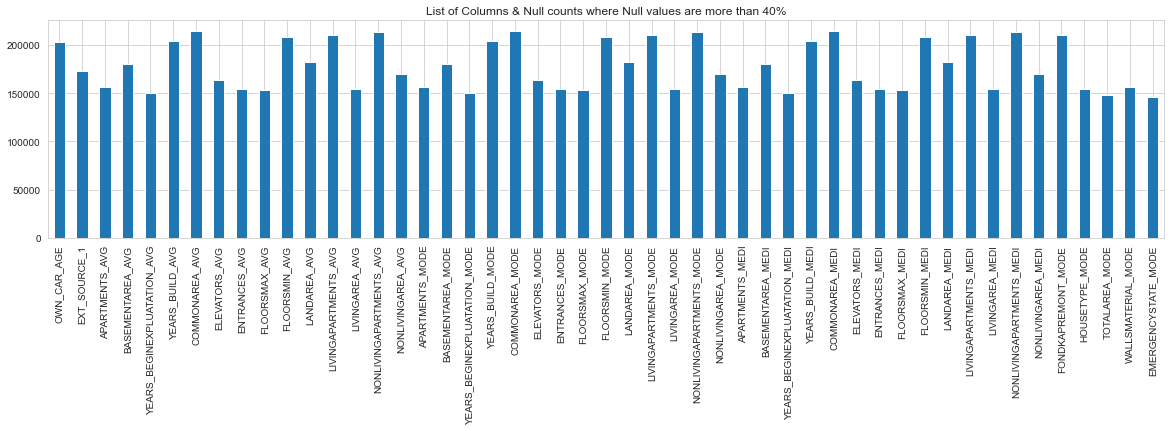

In [513]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar')
plt.title('List of Columns & Null counts where Null values are more than 40%')
plt.show()

In [514]:
#dropping columns with null values > 40%
listofnullcol = list(null_col.index)
application.drop(listofnullcol, axis = 1, inplace = True)

In [515]:
application.shape

(307511, 73)

In [516]:
#removing unwanted columns
dropcol = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 
'FLAG_EMAIL','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21' ]

application.drop(dropcol, axis = 1, inplace = True)

In [517]:
application.shape

(307511, 45)

In [518]:
#Finding how many null values are present in the 45 columns 
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

### Imputing missing values 

In [519]:
#Treating AMT_ANNUITY column
application.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [520]:
#Imputed AMT_ANNUITY column null values with median 
application['AMT_ANNUITY'].fillna(application['AMT_ANNUITY'].median(), inplace = True)

In [521]:
application.AMT_ANNUITY.isnull().sum()

0

In [522]:
#Treating AMT_GOODS_PRICE column
application.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [523]:
application['AMT_GOODS_PRICE'].fillna(application['AMT_GOODS_PRICE'].median(), inplace = True)

In [524]:
application.AMT_GOODS_PRICE.isnull().sum()

0

In [525]:
#Treating NAME_TYPE_SUITE column 
application.NAME_TYPE_SUITE.dtype
application.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [526]:
# Imputing the null values with most frequently occuring value 
application['NAME_TYPE_SUITE'].fillna(application.NAME_TYPE_SUITE.mode()[0], inplace = True)


In [527]:
application.NAME_TYPE_SUITE.isnull().sum()

0

In [528]:
#Treating OCCUPATION_TYPE column 
application.OCCUPATION_TYPE.dtype
application.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [529]:
application.OCCUPATION_TYPE.isnull().sum()

96391

Note: Laborers is frequently occuring value with count '55186' but null values of this column are '96391'. Null values are very large as compared to frequently occuring values. So we create separate category named "Unspecified" for all the null values.

In [530]:
application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].fillna('Not specified')
application.OCCUPATION_TYPE.value_counts()

Not specified            96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [531]:
#Treating CNT_FAM_MEMBERS column 
application.CNT_FAM_MEMBERS.dtype
application.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [532]:
#Replacing null values with median in CNT_FAM_MEMBERS column
application['CNT_FAM_MEMBERS'].fillna(application['CNT_FAM_MEMBERS'].median(), inplace = True)

In [533]:
application.isnull().sum()


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

We can see that last 13 columns have null values but we will leave it as it is for now and impute with proper values when required 

In [534]:
#Converting XNA category to F as very few values are present in XNA category and replacing those with F will not affect our dataset largely.
application.loc[application['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [535]:
#Converting 'unknown' category to 'married' as very few values are present in 'unknown' category and replacing those with 'married' will not affect our dataset largely.
application.loc[application['NAME_FAMILY_STATUS']=='Unknown','NAME_FAMILY_STATUS']='Married'
application['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

### Checking Unique Values

In [536]:
application.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_FAMILY_STATUS                  5
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_T

Columns having unique values more than 40 can be considered as continous columns where as columns with unique values less than 40 can be considered as categorical columns for analysis. 
Also, delete the columns with unique value as '1' as it is insignificant for analysis. 
Here we do not have any columns with unique value of 1 and so we are not deleting any columns.

Data Types 

In [537]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,Not specified,1.0,2,2,0,0,0,0,0,0,XNA,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,3,3,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [538]:
#Changing the negative values of columns DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH to positive 
neg_col = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for col in neg_col:
    application[col]=abs(application[col])

In [539]:
application.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0


In [540]:
application.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_REGION_NOT_LIVE_REGIO

### Checking Outliers


Approaches to handle Outliers are: Imputation, Deletion of outliers, Binning of values, Cap the outlier


Considering AMT_INCOME_TOTAL column for outlier analysis

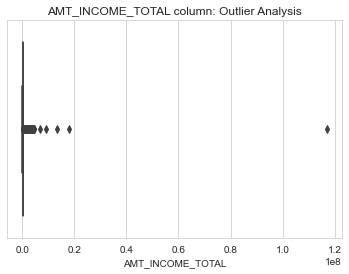

In [541]:
sns.boxplot(application.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL column: Outlier Analysis')
plt.show()

In [542]:
application.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Total income will vary from person to person and hence we can cap outliers in this scenario

Considering AMT_CREDIT column for outlier analysis

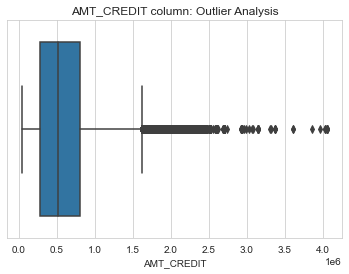

In [543]:
sns.boxplot(application.AMT_CREDIT)
plt.title('AMT_CREDIT column: Outlier Analysis')
plt.show()

Here we can see outliers, but this scenario is common as amount credit varies from person to person in reality.


Considering AMT_ANNUITY column for outlier analysis

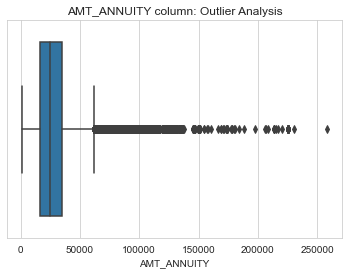

In [544]:
sns.boxplot(application.AMT_ANNUITY)
plt.title('AMT_ANNUITY column: Outlier Analysis')
plt.show()

In [545]:
application.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

There is not much difference between Mean and Median in AMT_ANNUITY column.
Also, one outlier at extreme right above 250000 is present.
We can impute outlier with median here.

Considering DAYS_BIRTH column for outlier analysis

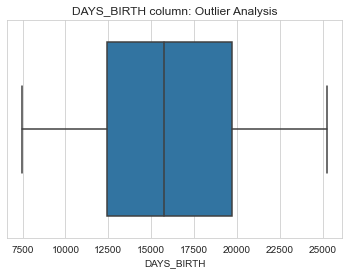

In [546]:
sns.boxplot(application.DAYS_BIRTH)
plt.title('DAYS_BIRTH column: Outlier Analysis')
plt.show()

No outliers present 

Considering CNT_CHILDREN column for outlier analysis

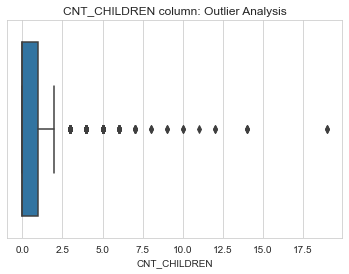

In [547]:
sns.boxplot(application.CNT_CHILDREN)
plt.title('CNT_CHILDREN column: Outlier Analysis')
plt.show()

Here, we can observe many outliers. But in reality it is difficult to have so many children and so we can impute higher values with median value 

Considering DAYS_EMPLOYED column for outlier analysis

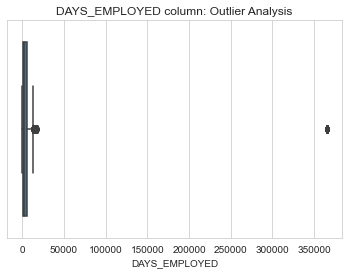

In [548]:
sns.boxplot(application.DAYS_EMPLOYED)
plt.title('DAYS_EMPLOYED column: Outlier Analysis')
plt.show()

Single outlier can be seen at extreme right but number of days the person is employed is different for every individual 

Considering DAYS_BIRTH column for outlier analysis

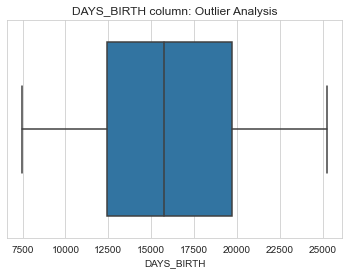

In [549]:
sns.boxplot(application.DAYS_BIRTH)
plt.title('DAYS_BIRTH column: Outlier Analysis')
plt.show()

No outlier present 

### Binning Continous Variables

In [550]:
# Creating bins for AMT_INCOME_RANGE column

bins = [0,100000,200000,300000, 400000, 500000, 10000000000]
slot = ['Very Low','Low', 'Below Average', 'Average', 'Above Average','High']

application['AMT_INCOME_RANGE']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=slot)

In [551]:
# Creating bins for DAYS_BIRTH column

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

application['AGE_RANGE']=pd.cut(application['DAYS_BIRTH'],bins,labels=slot)

In [552]:
#Creating bins for AMT_CREDIT_RANGE column

bins = [0,400000,750000,1000000000]
slots = ['Low','Medium','High']

application['AMT_CREDIT_RANGE']=pd.cut(application['AMT_CREDIT'],bins=bins,labels=slots)

In [553]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Below Average,20-30,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Below Average,40-50,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50-60,Medium


In [554]:
# Finding percentage of values for target 0 and target 1.
100*(application.TARGET.value_counts())/ (len(application))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

This mean 8% people will have difficulty in payments where as approximately 92% people will not have any payment difficulties

In [555]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = application.loc[application["TARGET"]==0]
target1 = application.loc[application["TARGET"]==1]

In [556]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0)/len(target1),2)

11.39

#### Imbalance ratio is 11.39

### Univariate Analysis

In [557]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Below Average,20-30,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Below Average,40-50,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50-60,Medium


#### Categorical variables

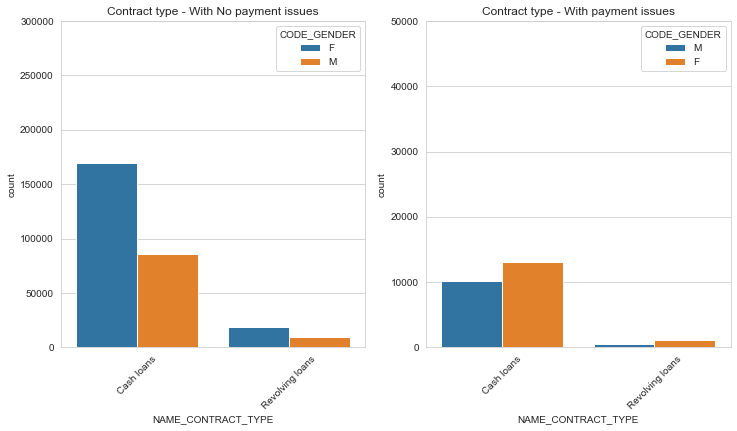

In [558]:
# Categorical variable analysis for NAME_CONTRACT_TYPE column
plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
sns.countplot(data = target0, x = 'NAME_CONTRACT_TYPE',hue = 'CODE_GENDER')
plt.title('Contract type - With No payment issues')
plt.ylim(0,300000)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(data = target1, x = 'NAME_CONTRACT_TYPE',hue = 'CODE_GENDER')
plt.title('Contract type - With payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

It can be observed that people with Cash Loan are facing more trouble than Revolving Loan Customers

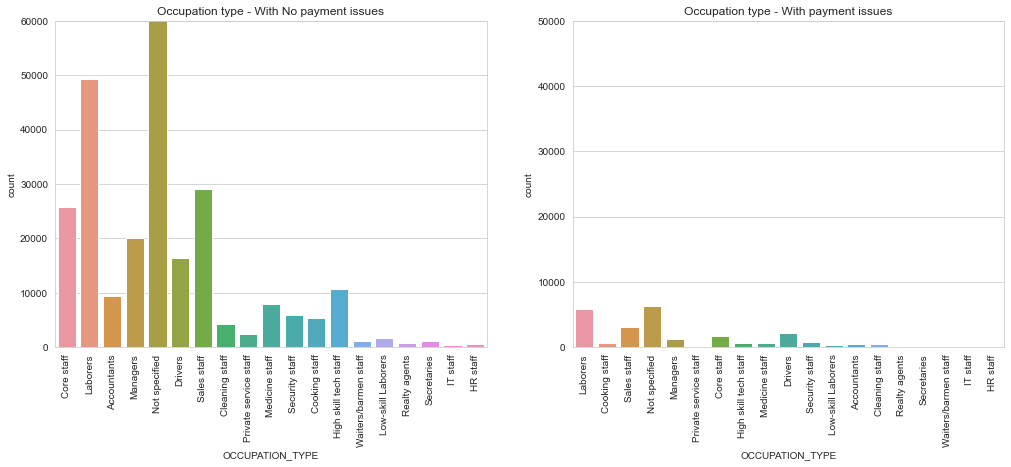

In [559]:
# Categorical variable analysis for OCCUPATION_TYPE column
plt.figure(figsize = (17,6))
plt.subplot(1, 2, 1)

sns.countplot(target0['OCCUPATION_TYPE'])
plt.title('Occupation type - With No payment issues')
plt.ylim(0,60000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target1['OCCUPATION_TYPE'])
plt.title('Occupation type - With payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

Ignoring the 'not specified' category as these people have not mentioned their occupation type.
Leaving apart 'not specified' category, we can see that maximum loan applications received are from laboreres.

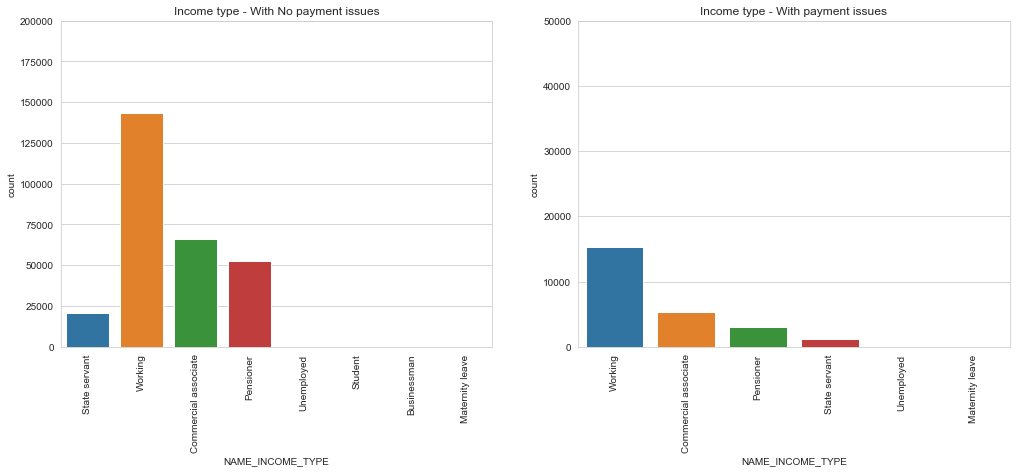

In [560]:
# Categorical variable analysis for NAME_INCOME_TYPE column
plt.figure(figsize = (17,6))
plt.subplot(1, 2, 1)

sns.countplot(target0['NAME_INCOME_TYPE'])
plt.title('Income type - With No payment issues')
plt.ylim(0,200000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_INCOME_TYPE'])
plt.title('Income type - With payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

Maximum number of application are received by Working class people

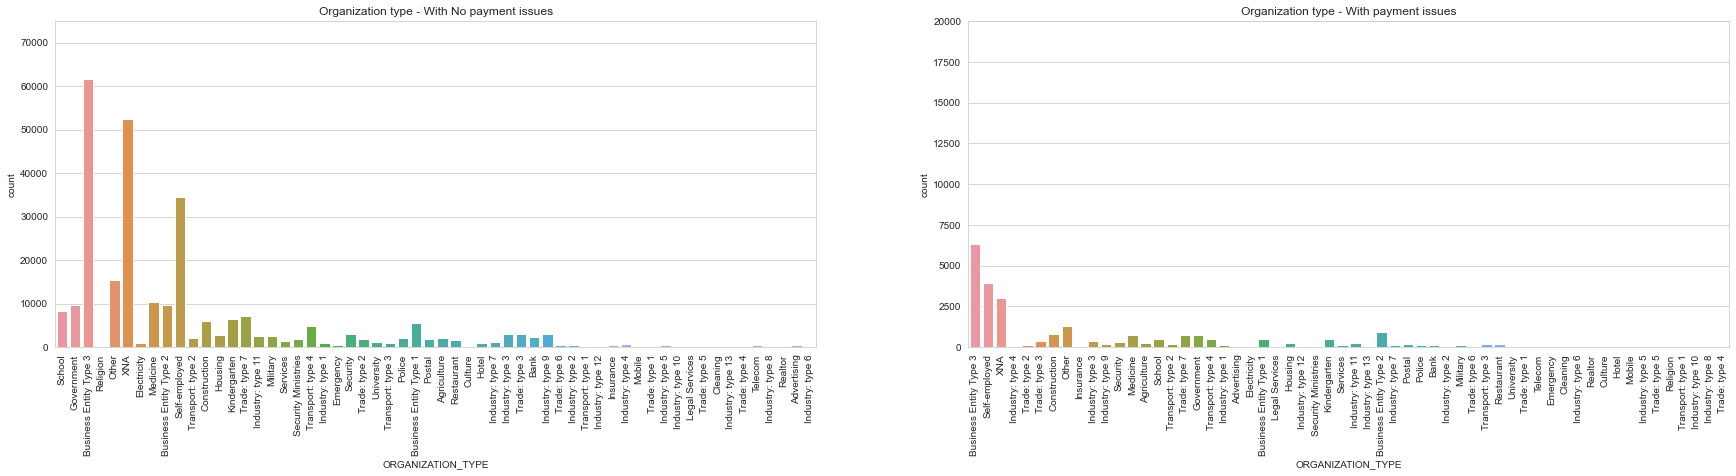

In [561]:
# Categorical variable analysis for ORGANIZATION_TYPE column
plt.figure(figsize = (30,6))
plt.subplot(1, 2, 1)

sns.countplot(target0['ORGANIZATION_TYPE'])
plt.title('Organization type - With No payment issues')
plt.ylim(0,75000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target1['ORGANIZATION_TYPE'])
plt.title('Organization type - With payment issues')
plt.ylim(0,20000)
plt.xticks(rotation = 90)
plt.show()

Maximum number of application are received by people from organization - Business entity type 3 

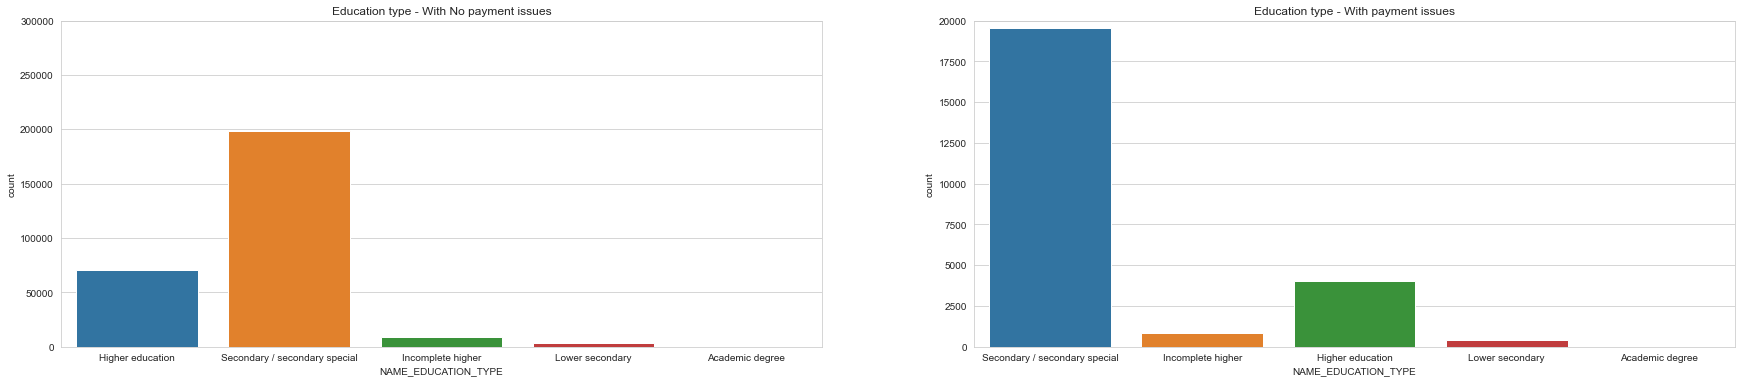

In [562]:
# Categorical variable analysis for NAME_EDUCATION_TYPE column
plt.figure(figsize = (30,6))
plt.subplot(1, 2, 1)

sns.countplot(target0['NAME_EDUCATION_TYPE'])
plt.title('Education type - With No payment issues')
plt.ylim(0,300000)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_EDUCATION_TYPE'])
plt.title('Education type - With payment issues')
plt.ylim(0,20000)
plt.show()

People with Secondary / Secondary special education are majorly applying for loans 

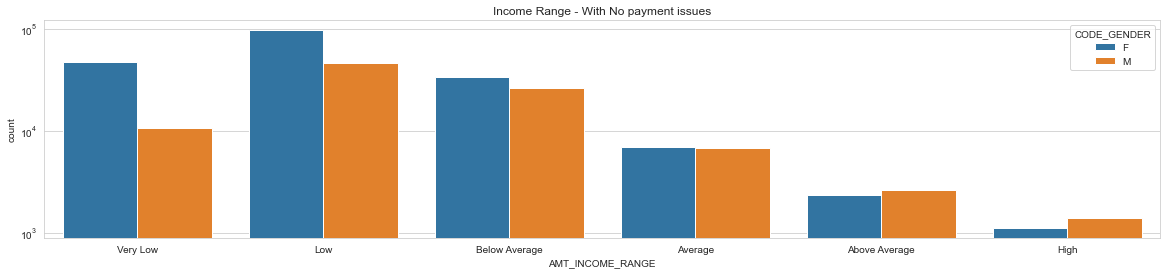

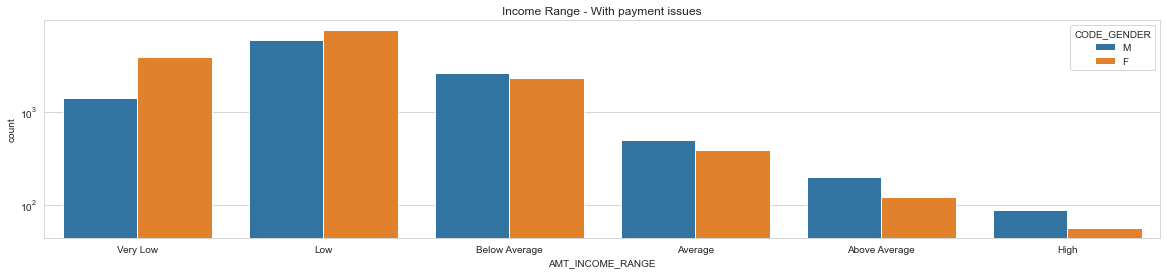

In [563]:

#Univariate analysis of target0 and target1 group for Income range 

plt.figure(figsize=(20,4))
plt.yscale('log')
plt.title('Income Range - With No payment issues')
ax = sns.countplot(data = target0, x = 'AMT_INCOME_RANGE',hue = 'CODE_GENDER') 
plt.show()


plt.figure(figsize=(20,4))
plt.yscale('log')
plt.title('Income Range - With payment issues')
ax = sns.countplot(data = target1, x = 'AMT_INCOME_RANGE',hue = 'CODE_GENDER') 
plt.show()

Observations:
1. Female count is higher than Males 
2. Maximum people seeking for loan lies in the Very Low to Average income slabs. 
3. Very few applications are received from people in Higher income slab 

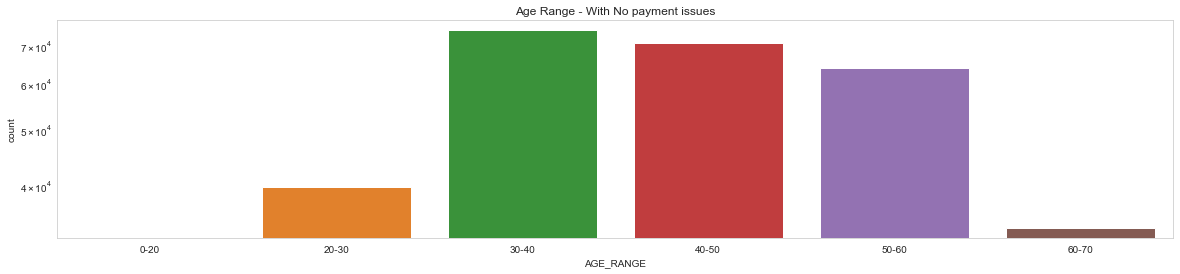

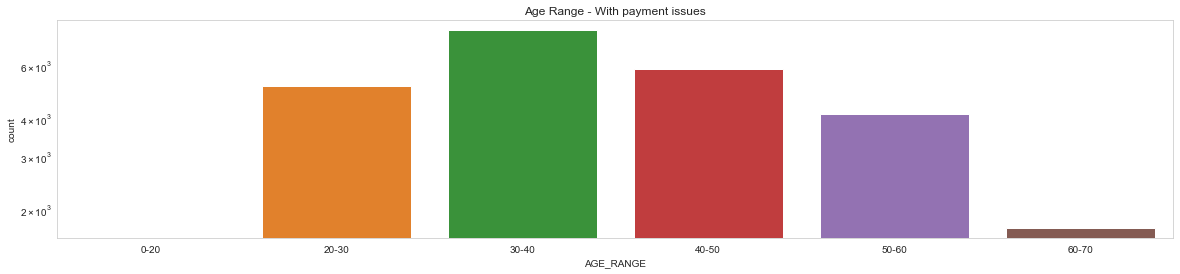

In [564]:
#Analysis of target0 and target1 group for Age range 

plt.figure(figsize=(20,4))
plt.yscale('log')
plt.title('Age Range - With No payment issues')
ax = sns.countplot(data = target0, x = 'AGE_RANGE') 
plt.show()


plt.figure(figsize=(20,4))
plt.yscale('log')
plt.title('Age Range - With payment issues')
ax = sns.countplot(data = target1, x = 'AGE_RANGE') 
plt.show()

1. People from the age group of 30-60 are mostly having no issues in loan repayments 
2. It should be observed that more number of people in the age group 20-30 are facing issues with loan repayments

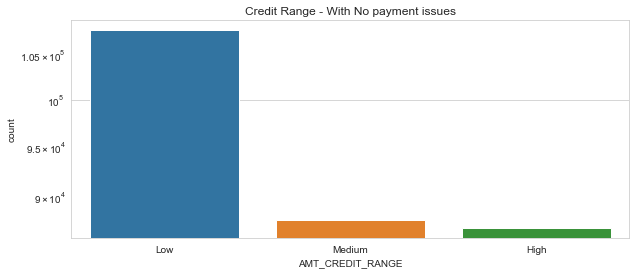

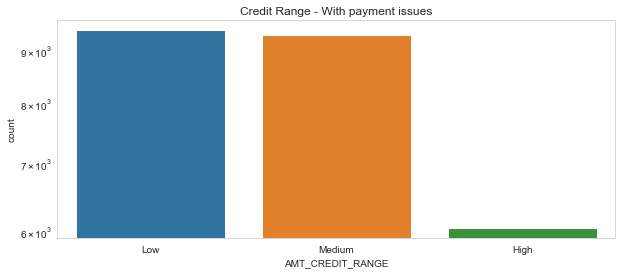

In [565]:
#Analysis of target0 and target1 group for Credit range 

plt.figure(figsize=(10,4))
plt.xticks(rotation=0)
plt.yscale('log')
plt.title('Credit Range - With No payment issues')
ax = sns.countplot(data = target0, x = 'AMT_CREDIT_RANGE') 
plt.show()


plt.figure(figsize=(10,4))
plt.xticks(rotation=0)
plt.yscale('log')
plt.title('Credit Range - With payment issues')
ax = sns.countplot(data = target1, x = 'AMT_CREDIT_RANGE') 
plt.show()

1. Majority of the loans given are Low credit loans
2. People with low credit loans and medium credit loans are struggling more for repayments

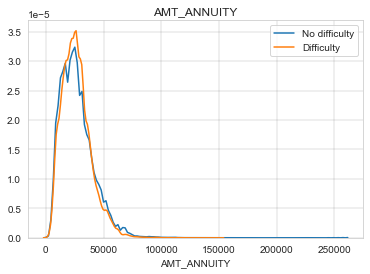

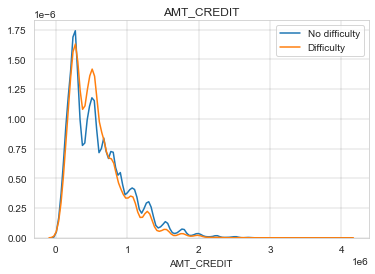

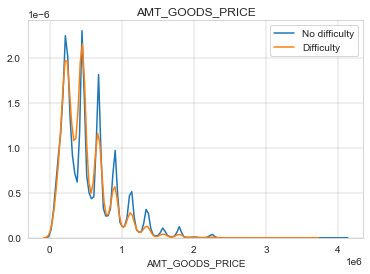

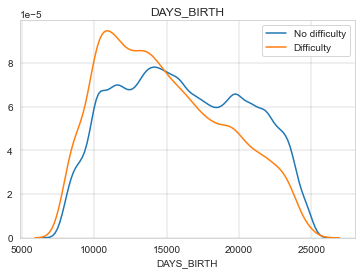

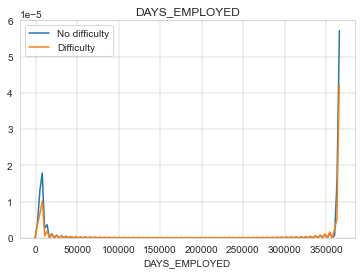

In [566]:
# Analysing continous columns 

cont_var = ['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']

for col in cont_var:
    sns.distplot(target0[col], hist = False, label="No difficulty")
    sns.distplot(target1[col], hist = False, label="Difficulty")
    plt.title(col)
    plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
    plt.show()

Observation:
1. People having difficulty in loan payments, have lower annuity amounts
2. Many Lower amount loans are given,which might have been given to less well off people and hence they are struggling with their repayments 
3. Younger people are struggling more for loan repayment which is obvious as financial stability comes with more professional experience and age
4. When people are employed for less time, they seem to be struggling for loan repayment 


#### Derived Column Analysis

We can derive Loan Terms by dividing AMT_CREDIT by AMT_ANNUITY. Lets see if it can give us some insights 

In [567]:
target0['LOAN_TERMS'] = target0['AMT_CREDIT']/target0['AMT_ANNUITY']
target1['LOAN_TERMS'] = target1['AMT_CREDIT']/target1['AMT_ANNUITY']

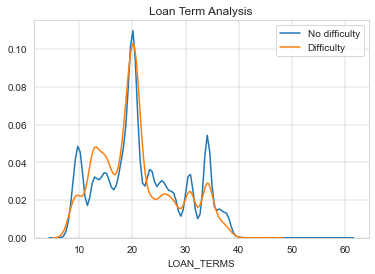

In [568]:
sns.distplot(target0['LOAN_TERMS'], hist = False, label="No difficulty")
sns.distplot(target1['LOAN_TERMS'], hist = False, label="Difficulty")
plt.title('Loan Term Analysis')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

People with Loan Terms between 19-23 seem to struggle in their loan repayments.
Banks can avoid this risk by lending loans for "more terms" or "less terms with more rate of interest". 

#### Some useful insights 

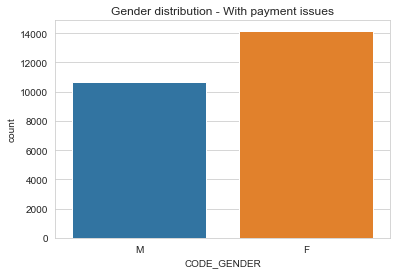

In [569]:
plt.title('Gender distribution - With payment issues')
ax = sns.countplot(data = target1, x = 'CODE_GENDER') 
plt.show()

Here we see that female are struggling for loan repayments 

Now lets check the % of females struggling for loan repayment overall as compared to males

In [570]:
application.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [571]:
target1.CODE_GENDER.value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

In [572]:
females_percent = (target1.CODE_GENDER.value_counts()[0] / application.CODE_GENDER.value_counts()[0])*100
females_percent

6.999189931440538

In [573]:
males_percent = (target1.CODE_GENDER.value_counts()[1] / application.CODE_GENDER.value_counts()[1])*100
males_percent

10.141920254333279

We can see that overall around 7% females struggle for loan repayment and 10% males struggle for loan repayment.
Here it is clear that just looking at absolute numbers is misleading sometimes. So, we should cross verify our results with overall dataset also.

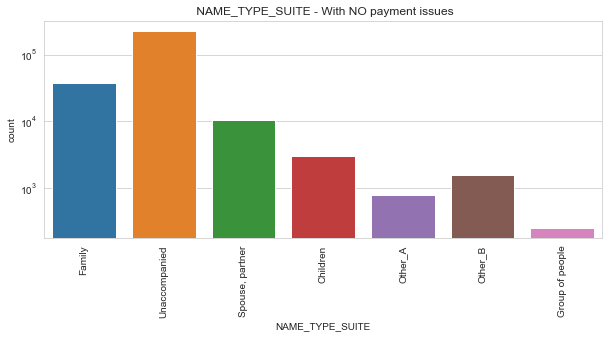

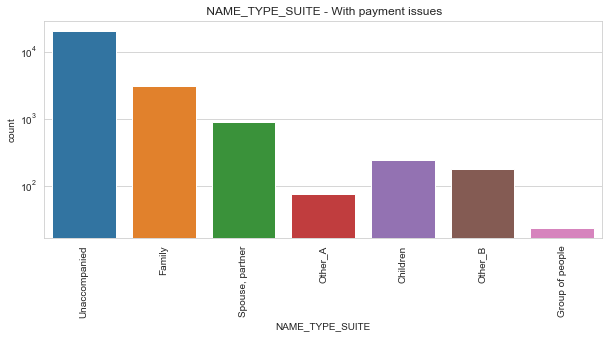

In [574]:
# analysing NAME_TYPE_SUITE column 
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title(' NAME_TYPE_SUITE - With NO payment issues')
ax = sns.countplot(data = target0, x = 'NAME_TYPE_SUITE') 
plt.show() 

plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title(' NAME_TYPE_SUITE - With payment issues')
ax = sns.countplot(data = target1, x = 'NAME_TYPE_SUITE') 
plt.show()

Here it can be observed that Unaccompanied people have issues in loan repayment

Lets check the overall percent of people who are struggling for loan repayment in NAME_TYPE_SUITE column 

In [575]:
application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [576]:
target1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      20407
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64

In [577]:
print ('Percent of People struggling for loan repayment who are Unaccompanied',(target1.NAME_TYPE_SUITE.value_counts()[0] / application.NAME_TYPE_SUITE.value_counts()[0])*100)
print ('Percent of People struggling for loan repayment Accompanied by Family',(target1.NAME_TYPE_SUITE.value_counts()[1] / application.NAME_TYPE_SUITE.value_counts()[1])*100)
print ('Percent of People struggling for loan repayment Accompanied by Spouse, partner',(target1.NAME_TYPE_SUITE.value_counts()[2] / application.NAME_TYPE_SUITE.value_counts()[2])*100)
print ('Percent of People struggling for loan repayment who are Accompanied by Children',(target1.NAME_TYPE_SUITE.value_counts()[3] / application.NAME_TYPE_SUITE.value_counts()[3])*100)
print ('Percent of People struggling for loan repayment who are Accompanied by Other_B ',(target1.NAME_TYPE_SUITE.value_counts()[4] / application.NAME_TYPE_SUITE.value_counts()[4])*100)
print ('Percent of People struggling for loan repayment who are Accompanied by Other_A',(target1.NAME_TYPE_SUITE.value_counts()[5] / application.NAME_TYPE_SUITE.value_counts()[5])*100)
print ('Percent of People struggling for loan repayment who are Accompanied by Group of people',(target1.NAME_TYPE_SUITE.value_counts()[6] / application.NAME_TYPE_SUITE.value_counts()[6])*100)

Percent of People struggling for loan repayment who are Unaccompanied 8.168746847705128
Percent of People struggling for loan repayment Accompanied by Family 7.494582679518793
Percent of People struggling for loan repayment Accompanied by Spouse, partner 7.871591908531222
Percent of People struggling for loan repayment who are Accompanied by Children 7.376798285889195
Percent of People struggling for loan repayment who are Accompanied by Other_B  9.830508474576272
Percent of People struggling for loan repayment who are Accompanied by Other_A 8.775981524249422
Percent of People struggling for loan repayment who are Accompanied by Group of people 8.487084870848708


*** From the above results, it is clear that People who are Accompanied by Other_B, Other_A and Group of people are struggling for Loan repayments. Where as Unaccompanied people are in middle of all and those accompanied by Family, spouse-partner, Children are NOT struggling for loan repayments 



This is one more example of how just looking at target1 dataframe can be misleading.
In such cases it is better to compare target1 (Risk) dataframe with overall application dataframe for better understanding 

We can see that analysing Target1 dataframe alone can be misleading, so lets define function to analyse Total Applications, target1 applications, target0 applicatios, and target1 applications with respect to total applications

In [578]:
def plot_cols(feature,label_rotation=False,horizontal_layout=True):
    
    target0_df = application[application['TARGET']==0]
    target1_df = application[application['TARGET']==1]
    
    temp1 = application[feature].value_counts()
    temp2 = target0_df[feature].value_counts()
    temp3 = target1_df[feature].value_counts()
    
    df1 = pd.DataFrame({feature: temp1.index,'Total Applicants': temp1.values})
    df2 = pd.DataFrame({feature: temp2.index,'Target-0': temp2.values})
    df3 = pd.DataFrame({feature: temp3.index,'Target-1': temp3.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, ([ax1, ax2,] , [ax3, ax4]) = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
    else:
        fig, ([ax1, ax2 , ax3, ax4]) = plt.subplots( nrows=4, figsize=(12,34))
    sns.set_color_codes("dark")
    s = sns.barplot(ax=ax1, x = feature, y='Total Applicants',data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)        
    s = sns.barplot(ax=ax2, x = feature, y='Target-0',data=df2)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90) 
    s = sns.barplot(ax=ax3, x = feature, y='Target-1',data=df3)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90) 
    s = sns.barplot(ax=ax4, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90) 
    
    plt.ylabel('% of Applicants with Target = 1', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print('Total Number of Applicants:', feature)
    print(temp1,'\n')
    print('Applicants with Target=1:', feature)
    print(temp3,'\n')
    ;

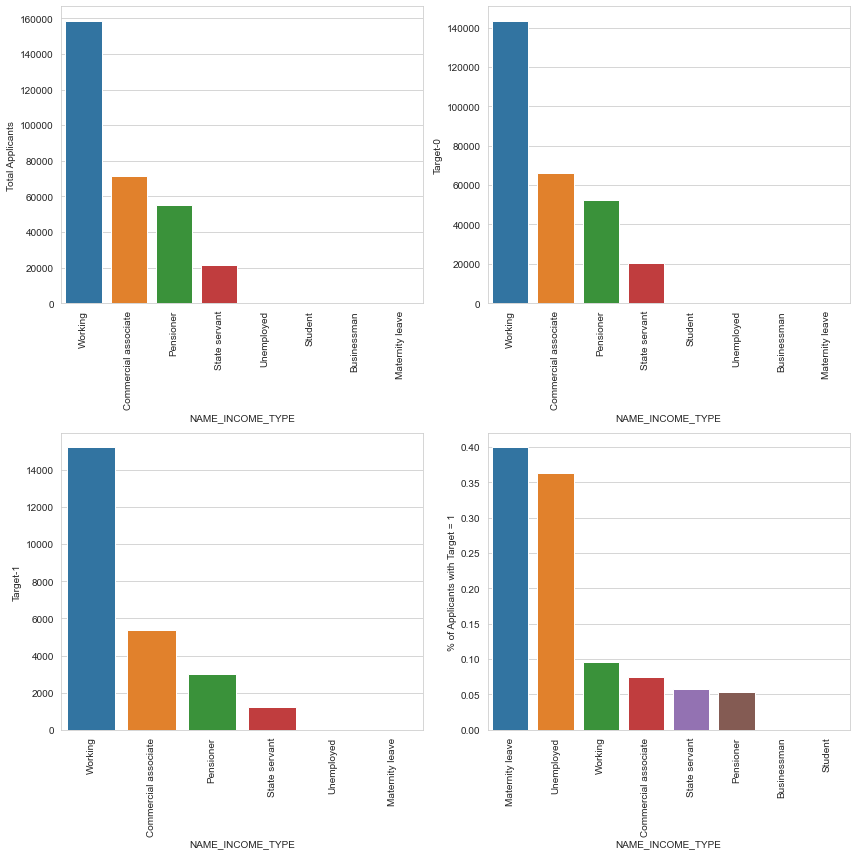

Total Number of Applicants: NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64 

Applicants with Target=1: NAME_INCOME_TYPE
Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64 



In [579]:
plot_cols('NAME_INCOME_TYPE',True)

We can see that there are very few loan applications from "Unemployed" and "Maternity leave" category or many be bank is not lending much loan to people belonging to this category beacuse as we can see, the probability of people facing issues in loan repayment is very high (visible from 4th graph). 
Bank should examine closely before lending loans to people from "Unemployed" and "Maternity leave" category.

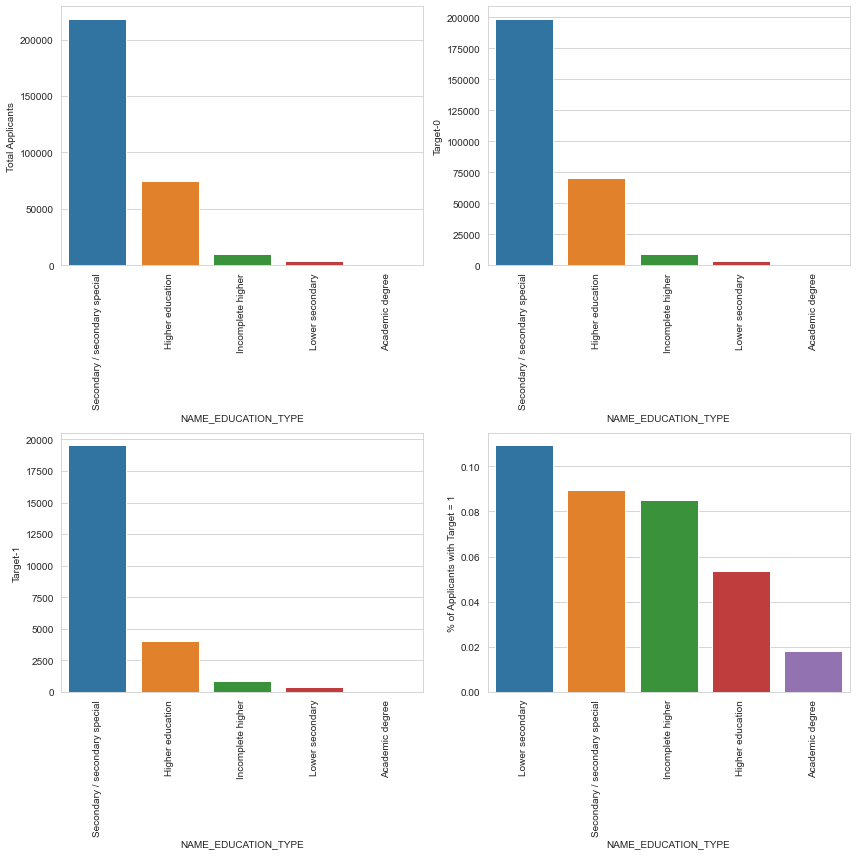

Total Number of Applicants: NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64 

Applicants with Target=1: NAME_EDUCATION_TYPE
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64 



In [580]:
plot_cols('NAME_EDUCATION_TYPE', True)

People with "Lower secondary" and "Secondary / secondary special" category are struggling for loan repayment.
This seems obvious because mostly people with less educational qualification tend to receive lower income and thus might not be able to manage loan terms.

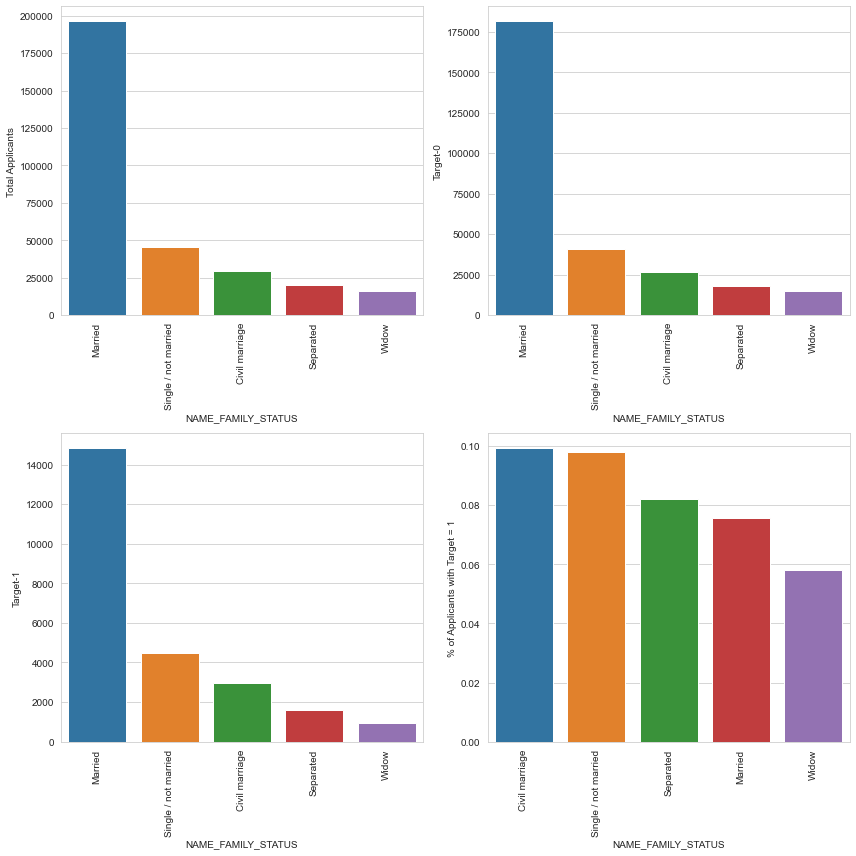

Total Number of Applicants: NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64 

Applicants with Target=1: NAME_FAMILY_STATUS
Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64 



In [581]:
plot_cols('NAME_FAMILY_STATUS', True)

People from "Civil marriage" and "single / not married" category seem to face issues in loan repayment.
Bank should scrutinize these people before lending loans 

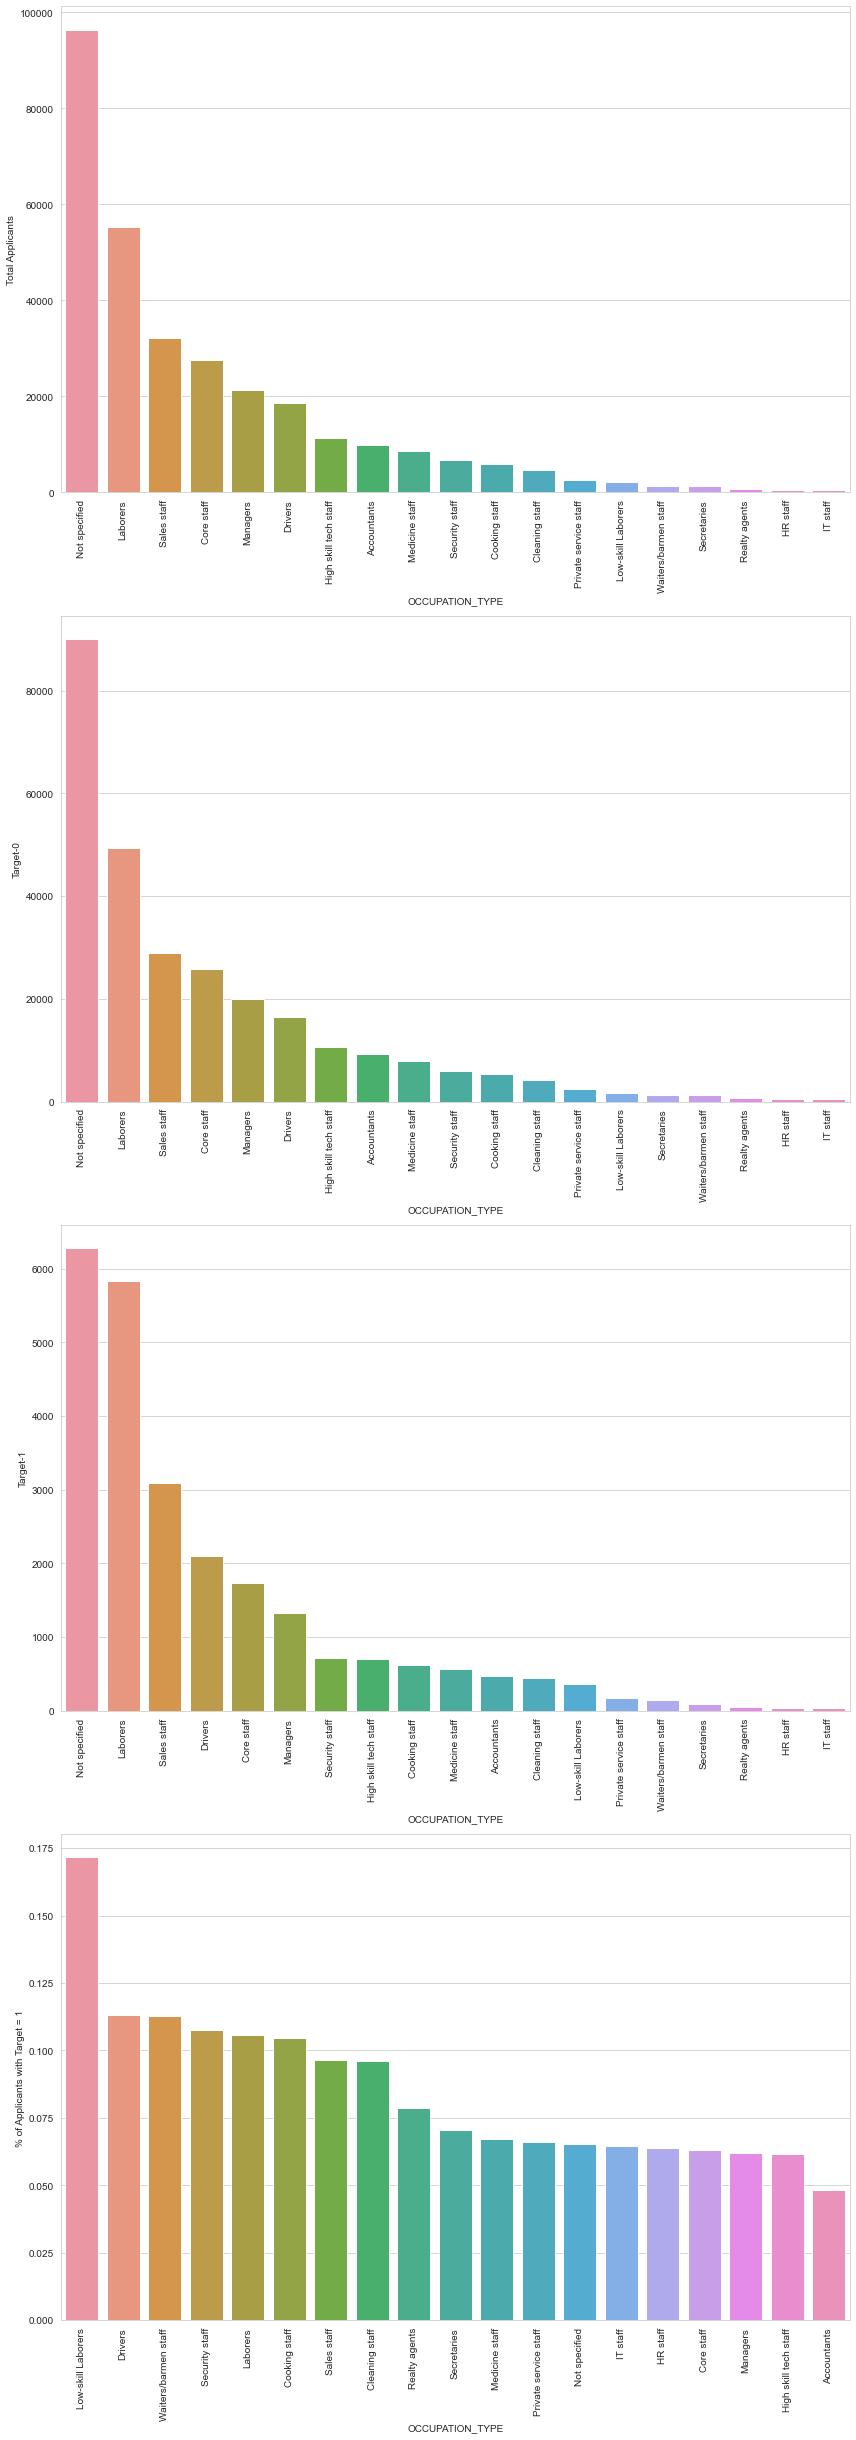

Total Number of Applicants: OCCUPATION_TYPE
Not specified            96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

Applicants with Target=1: OCCUPATION_TYPE
Not specified            6278
Laborers                 5838
Sales staff              3092
Drivers                  2107
Core staff               1738
Managers                 1328
Security staff            722
High skill tech staff     701
Cooking staff             621
Medicine staff   

In [582]:
plot_cols('OCCUPATION_TYPE', True, False)

Low-skill Laborers, Drivers, Waiters/barmen staff, Security staff, Laborers and Cooking staff seem to default.
Very low number of Accountants are facing issues while loan repayments as being accountant they are particular about managing finances on time.

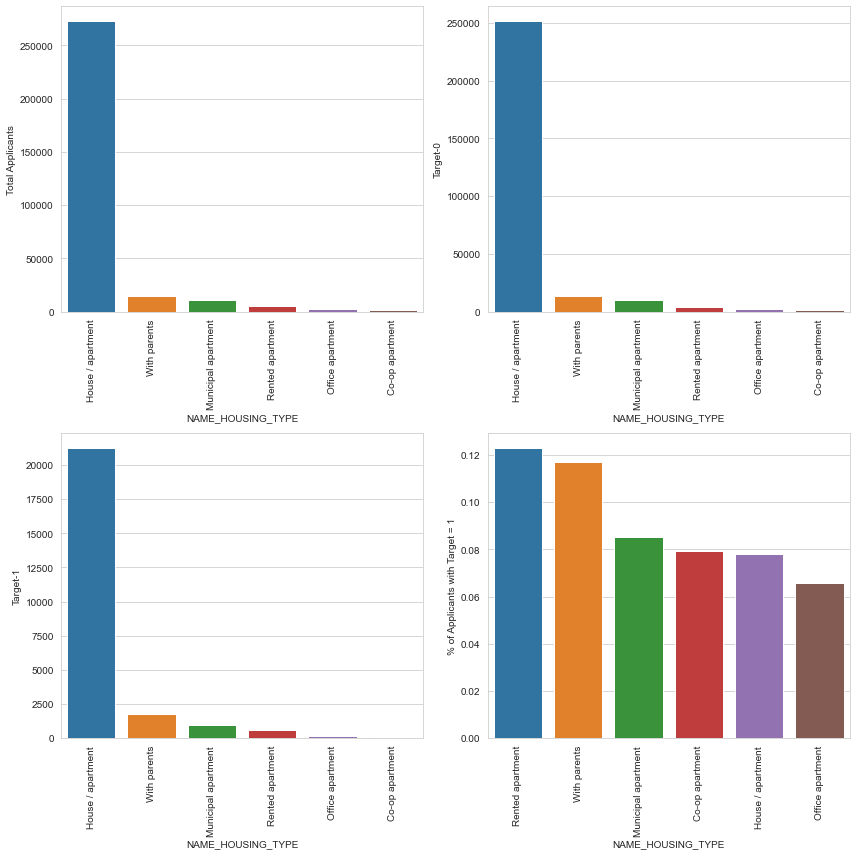

Total Number of Applicants: NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64 

Applicants with Target=1: NAME_HOUSING_TYPE
House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64 



In [583]:
plot_cols('NAME_HOUSING_TYPE',True)

Applicants from "Rented apartment" and those from "With parents" category seems to default.
This might be because person has to pay the rent of his house and loan term at the end of every month and this might be difficult to manage.
On the other hand those who live with parents have might be having more household expenses as they have more family members and thus they might be facing issues while repaying loans 

### Bivariate Analysis

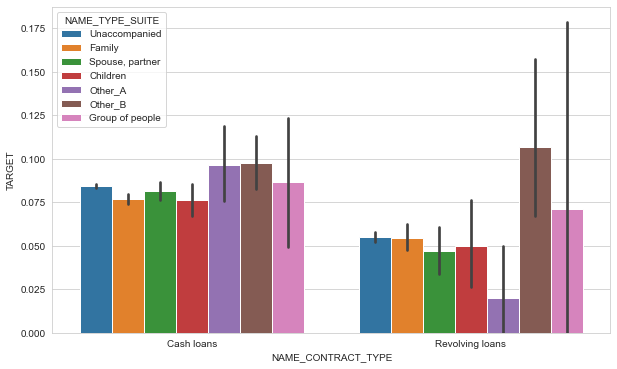

In [584]:
plt.figure(figsize=[10, 6])
sns.barplot(x='NAME_CONTRACT_TYPE', y="TARGET", hue='NAME_TYPE_SUITE', data=application)
plt.show()

Observation:
1. cash loans have more defaulters than revolving loans
2. Interestingly Other_B in revolving loans has higher default than Other_B in cash loans 

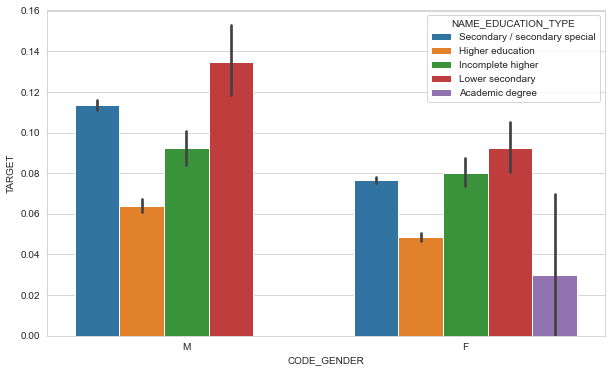

In [585]:
plt.figure(figsize=[10, 6])
sns.barplot(x='CODE_GENDER', y="TARGET", hue='NAME_EDUCATION_TYPE', data=application)
plt.show()

Observation:
1. It confirms that Lower secondary and secondary/secondary special are more likely to default 
2. Females with academic degree tend to default. This insight was not visible earlier and is important one to note here.

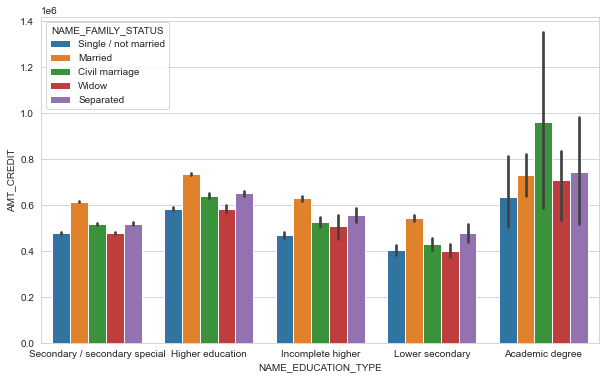

In [586]:
plt.figure(figsize=[10, 6])
sns.barplot(x='NAME_EDUCATION_TYPE', y="AMT_CREDIT", hue='NAME_FAMILY_STATUS', data=application)
plt.show()

Observation:
People with Academic degree tend to have higher amount credits irrespective of family status 

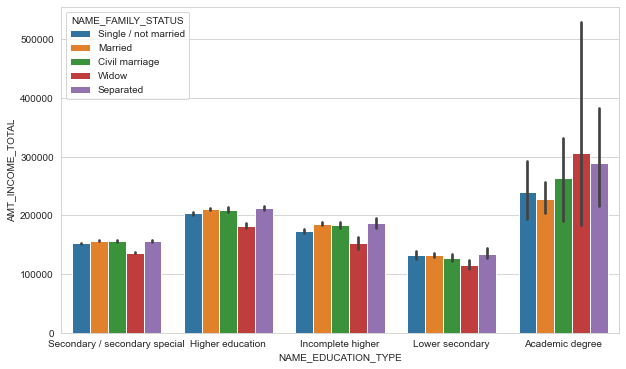

In [587]:
plt.figure(figsize=[10, 6])
sns.barplot(x='NAME_EDUCATION_TYPE', y="AMT_INCOME_TOTAL", hue='NAME_FAMILY_STATUS', data=application)
plt.show()


Observation: People with Academic degree tend to have higher income irrespective of family status

### Correlation Matrix

In [588]:
correlation = application.corr()['TARGET'].sort_values()
correlation

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
DAYS_BIRTH                    -0.078239
DAYS_ID_PUBLISH               -0.051457
DAYS_EMPLOYED                 -0.047046
DAYS_REGISTRATION             -0.041975
AMT_GOODS_PRICE               -0.039623
REGION_POPULATION_RELATIVE    -0.037227
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012815
AMT_REQ_CREDIT_BUREAU_MON     -0.012462
AMT_INCOME_TOTAL              -0.003982
SK_ID_CURR                    -0.002108
AMT_REQ_CREDIT_BUREAU_QRT     -0.002022
AMT_REQ_CREDIT_BUREAU_WEEK     0.000788
AMT_REQ_CREDIT_BUREAU_HOUR     0.000930
AMT_REQ_CREDIT_BUREAU_DAY      0.002704
LIVE_REGION_NOT_WORK_REGION    0.002819
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930


In [589]:
# Taking top 5 most positive and bottom 5 most negative value index for generating correlation dataframe
pos_cor = list(correlation.tail(10).index)
neg_cor = list(correlation.head(10).index)
corr_cols = pos_cor + neg_cor
corr_cols

['AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'TARGET',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AMT_CREDIT',
 'AMT_ANNUITY']

In [590]:
#Generating dataframe
corr_df = application[corr_cols]
plot_corr = corr_df.corr()
plot_corr

,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_ANNUITY
AMT_REQ_CREDIT_BUREAU_YEAR,1.000000,0.017190,0.018590,-0.008415,-0.004793,-0.008013,-0.112725,0.011494,0.010683,0.019930,-0.071449,-0.021984,0.071983,0.035099,0.050002,0.024805,-0.050940,0.001003,-0.048448,-0.011323
DEF_60_CNT_SOCIAL_CIRCLE,0.017190,1.000000,0.860517,-0.003354,0.007557,0.001884,0.002001,0.017931,0.017076,0.031276,-0.034096,-0.032340,-0.001925,-0.004328,0.013911,-0.004538,-0.024496,0.002404,-0.023767,-0.023999
DEF_30_CNT_SOCIAL_CIRCLE,0.018590,0.860517,1.000000,-0.004083,0.007167,0.000493,0.000423,0.015394,0.013935,0.032248,-0.036253,-0.030406,-0.000206,-0.002738,0.016460,-0.003361,-0.022231,0.006329,-0.021229,-0.022831
LIVE_CITY_NOT_WORK_CITY,-0.008415,-0.003354,-0.004083,1.000000,0.028112,0.825575,0.021388,-0.019154,-0.002805,0.032518,-0.044310,-0.058900,-0.158882,-0.061094,-0.220332,-0.072658,-0.001334,-0.015188,0.000081,0.010080
REG_CITY_NOT_LIVE_CITY,-0.004793,0.007557,0.007167,0.028112,1.000000,0.440409,0.054183,0.035741,0.045669,0.044395,-0.078477,-0.043266,-0.180382,-0.076326,-0.093835,-0.064334,-0.027206,-0.050499,-0.026886,-0.006217
REG_CITY_NOT_WORK_CITY,-0.008013,0.001884,0.000493,0.825575,0.440409,1.000000,0.046788,0.008360,0.028081,0.050994,-0.079729,-0.075970,-0.242401,-0.099354,-0.258314,-0.099874,-0.020348,-0.044057,-0.018856,0.000894
DAYS_LAST_PHONE_CHANGE,-0.112725,0.002001,0.000423,0.021388,0.054183,0.046788,1.000000,0.026022,0.025717,0.055218,-0.075256,-0.195764,-0.082939,-0.088576,0.019159,-0.056983,-0.076294,-0.044013,-0.073701,-0.063746
REGION_RATING_CLIENT,0.011494,0.017931,0.015394,-0.019154,0.035741,0.008360,0.026022,1.000000,0.950842,0.058899,-0.012903,-0.292895,-0.009361,0.005103,0.033046,-0.080210,-0.103759,-0.532877,-0.101776,-0.128516
REGION_RATING_CLIENT_W_CITY,0.010683,0.017076,0.013935,-0.002805,0.045669,0.028081,0.025717,0.950842,1.000000,0.060893,-0.012158,-0.288299,-0.008073,0.007737,0.034880,-0.074038,-0.112185,-0.531535,-0.110915,-0.141674
TARGET,0.019930,0.031276,0.032248,0.032518,0.044395,0.050994,0.055218,0.058899,0.060893,1.000000,-0.178919,-0.160472,-0.078239,-0.051457,-0.047046,-0.041975,-0.039623,-0.037227,-0.030369,-0.012815


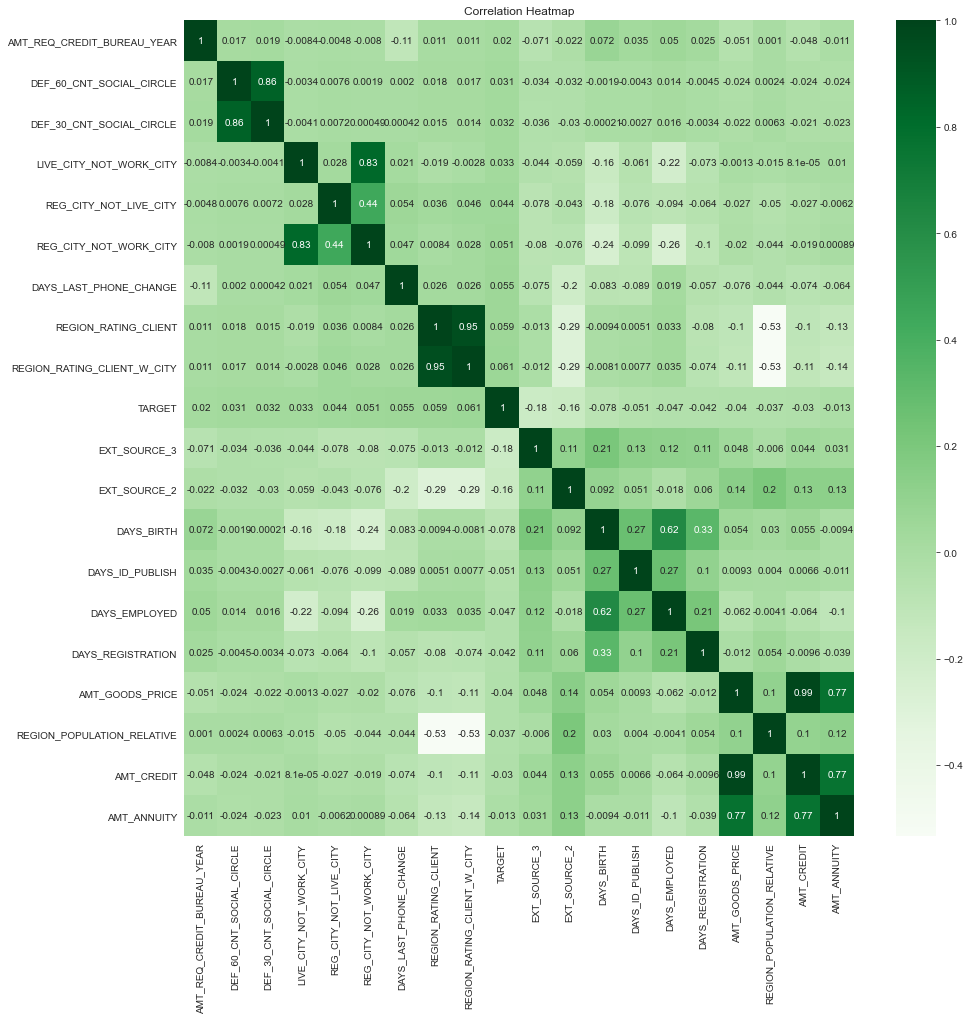

In [591]:
#Generating Heatmap
plt.figure(figsize = (15, 15))

sns.heatmap(plot_corr, cmap="Greens", annot = True)
plt.title('Correlation Heatmap');

1. DAYS_BIRTH and DAYS_EMPLOYED are highly co-related, which is true as people with higher age will have more professional experience 
2. High correlation between DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE. 
3. AMT_GOODS_PRICE and AMT_CREDIT seem to have higher correlation 
4. REGION_POPULATION_RELATIVE and REGION_RATING_CLIENT have negative correlation 


In [592]:
interested_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
interested_col

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

In [593]:
int_df = target1[interested_col]
plot_col = int_df.corr()
plot_col

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421
AMT_CREDIT,0.038131,1.000000,0.752195
AMT_ANNUITY,0.046421,0.752195,1.000000


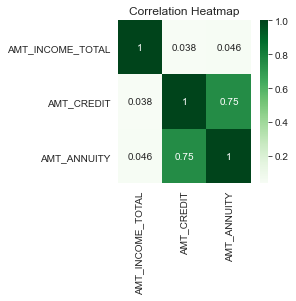

In [594]:
#Generating Heatmap
plt.figure(figsize = (3, 3))

sns.heatmap(plot_col, cmap="Greens", annot = True)
plt.title('Correlation Heatmap');

1. Annuity amount seems to be highly co-related to Credit amount
2. AMT_CREDIT and AMT_INCOME_TOTAL have very weak correlation 

# Analysing Previous Application Dataset 

In [595]:
prevapp = pd.read_csv("/Users/shweta/Downloads/previous_application.csv")

In [596]:
prevapp.shape

(1670214, 37)

In [597]:
prevapp.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [598]:
#Columns with more than 90% null values 
null_col = prevapp.isnull().sum()

null_col = null_col[null_col.values > (0.9*len(prevapp))]
len(null_col)

2

In [599]:
# Drop columns with null values more than 90%
listofnullcol = list(null_col.index)
prevapp.drop(listofnullcol, axis = 1, inplace = True)

In [600]:
prevapp.drop_duplicates(keep='last', inplace=True)

In [601]:
prevapp.shape

(1670214, 35)

In [602]:
#Dropping columns which are not so important for analysis  
drop = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']
prevapp.drop(drop, axis = 1, inplace = True)

In [603]:
prevapp.shape

(1670214, 33)

### Checking for Outliers 

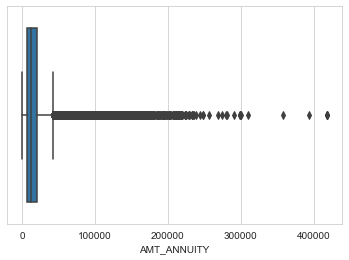

In [604]:
sns.boxplot(x=prevapp["AMT_ANNUITY"])

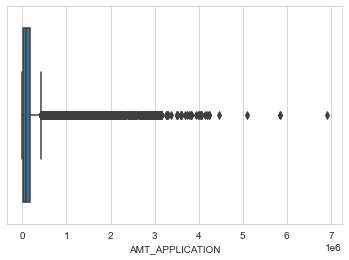

In [605]:
sns.boxplot(x=prevapp["AMT_APPLICATION"])

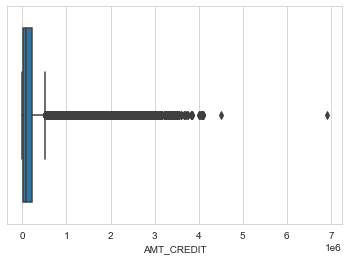

In [606]:
sns.boxplot(x=prevapp["AMT_CREDIT"])

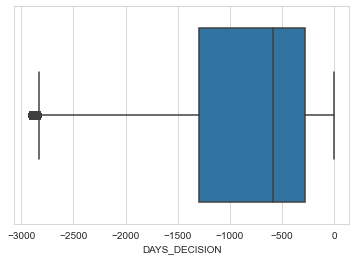

In [607]:
sns.boxplot(x=prevapp["DAYS_DECISION"])

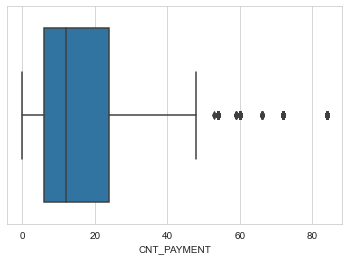

In [608]:
sns.boxplot(x=prevapp["CNT_PAYMENT"])

We can observe that AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, DAYS_DECISION, CNT_PAYMENT all have outliers.
But these values can be present in real life scenario so we can keep them for now.
For example, AMT_APPLICATION have outlier which is obvious because some people can apply for higher loans and AMT_CREDIT also show outliers which verifies that some people who applied for higher loans has received the loans as per their request. 

### Analysis 

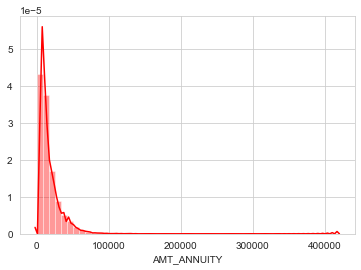

In [609]:
sns.distplot(prevapp['AMT_ANNUITY'],color ='red', bins = 50)

In [610]:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


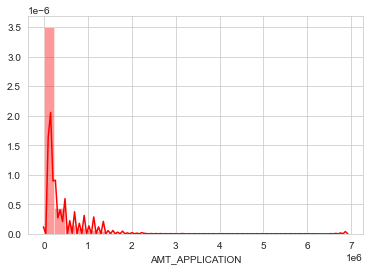

In [611]:
sns.distplot(prevapp['AMT_APPLICATION'],color ='red', bins = 30)

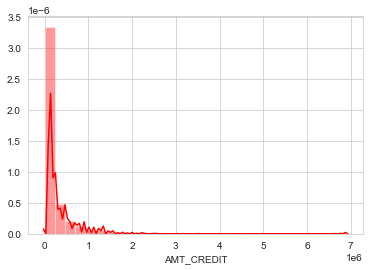

In [612]:
sns.distplot(prevapp['AMT_CREDIT'],color ='red', bins = 30)

Observation: <br>
AMT_APPLICATION and AMT_CREDIT both have more distribution in lower area which means majority of people have applied for lower loans amounts and these have been granted. 
There are few who have applied for higher loans and have been granted requested amounts.

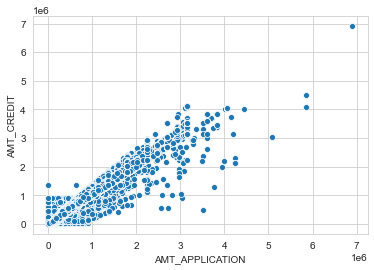

In [613]:
sns.scatterplot(data=prevapp, x="AMT_APPLICATION", y="AMT_CREDIT")

Observation: <br>
Here we can confirm that AMT_CREDIT and AMT_APPLICATION have kind of linear relationship.
Most of the people have received the loan amounts which they have requested for.
Where as there are few people who requested for more loan amounts but received lower than requested.

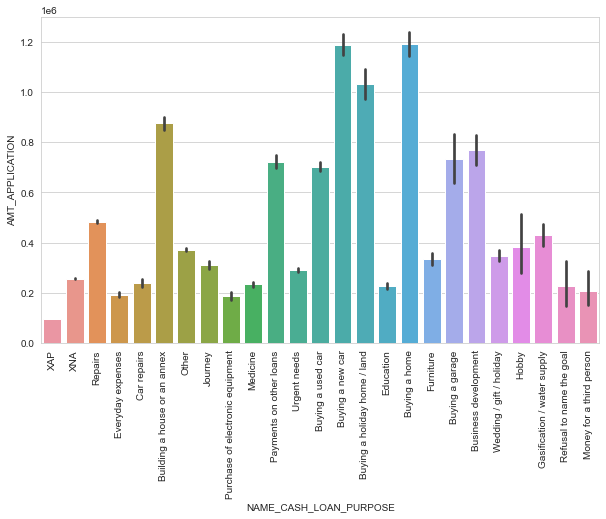

In [614]:
plt.figure(figsize=[10, 6])
plt.xticks(rotation=90)
sns.barplot(x="NAME_CASH_LOAN_PURPOSE", y="AMT_APPLICATION", data=prevapp)

Observation: <br>
We can observe that majority of applicants are seeking for loan for the "Buying a home", "Buying a new car" and "Buying a holiday home/land" purposes.

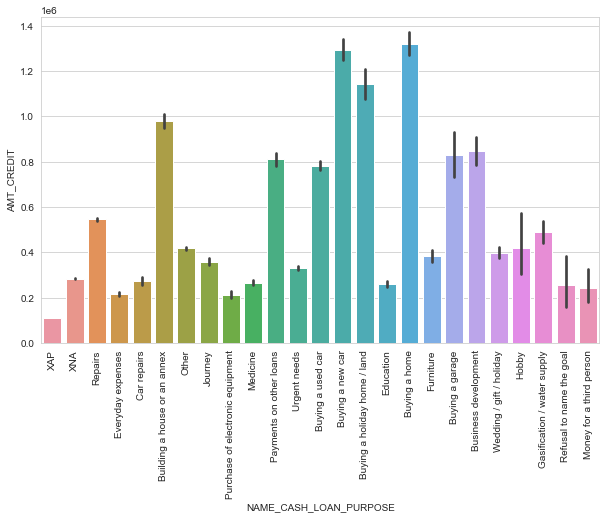

In [615]:
plt.figure(figsize=[10, 6])
plt.xticks(rotation=90)
sns.barplot(x="NAME_CASH_LOAN_PURPOSE", y="AMT_CREDIT", data=prevapp)

Observation: <br>
Majority of loans haven been given for the "Buying a home", "Buying a new car" and "Buying a holiday home/land" purposes

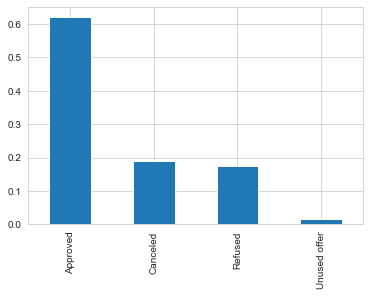

In [616]:
prevapp.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.bar()

Observation: <br>
Most of the application received are approved by bank.

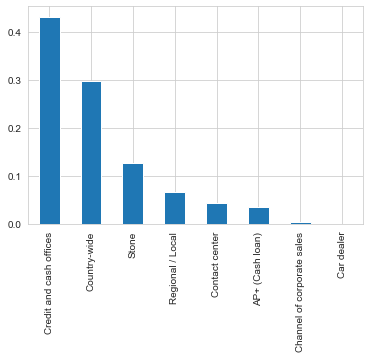

In [617]:
prevapp.CHANNEL_TYPE.value_counts(normalize = True).plot.bar()

Observation: <br>
Most of the applications are received through Credit and cash offices.

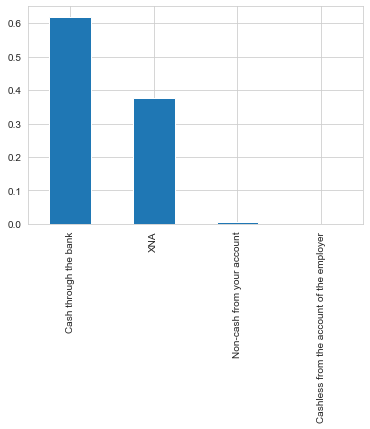

In [618]:
prevapp.NAME_PAYMENT_TYPE.value_counts(normalize = True).plot.bar()

Observation: <br>
Client chooses mostly Cash through the bank method to pay

In [619]:
prevapp.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

Observe that there too many values with XAP and XNA.
These are the people who havent mentioned the purpose of seeking loan.

In [620]:
# Lets deal with XAP and XNA of NAME_CASH_LOAN_PURPOSE column.
prevapp=prevapp.drop(prevapp[prevapp['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prevapp=prevapp.drop(prevapp[prevapp['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

# Merging Applications dataset with Previous Application dataset and to find interesting patterns 

In [621]:
#We merge 2 datasets with inner join to find common columns in them 
merged_app= pd.merge(application, prevapp, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,NaN,NaN,NaN,NaN,NaN,NaN,Very Low,20-30,Low,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,Y,1,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Not specified,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0.0,0.0,0.0,1.0,0.0,5.0,Below Average,40-50,Medium,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,Y,1,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,3.0,2,2,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0.0,0.0,0.0,0.0,1.0,1.0,Average,30-40,Medium,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,Y,1,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,-540.0,0.0,0.0,0.0,1.0,0.0,1.0,Low,40-50,Medium,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,Y,1,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,2,2,0,0,0,0,0,0,B

In [622]:
merged_app.shape

(59413, 80)

In [623]:
#Renaming the columns 
new_merge = merged_app.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,NaN,NaN,NaN,NaN,NaN,NaN,Very Low,20-30,Low,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,Y,1,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Not specified,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0.0,0.0,0.0,1.0,0.0,5.0,Below Average,40-50,Medium,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,Y,1,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,3.0,2,2,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0.0,0.0,0.0,0.0,1.0,1.0,Average,30-40,Medium,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,Y,1,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,-540.0,0.0,0.0,0.0,1.0,0.0,1.0,Low,40-50,Medium,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,Y,1,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,2,2,0,0,

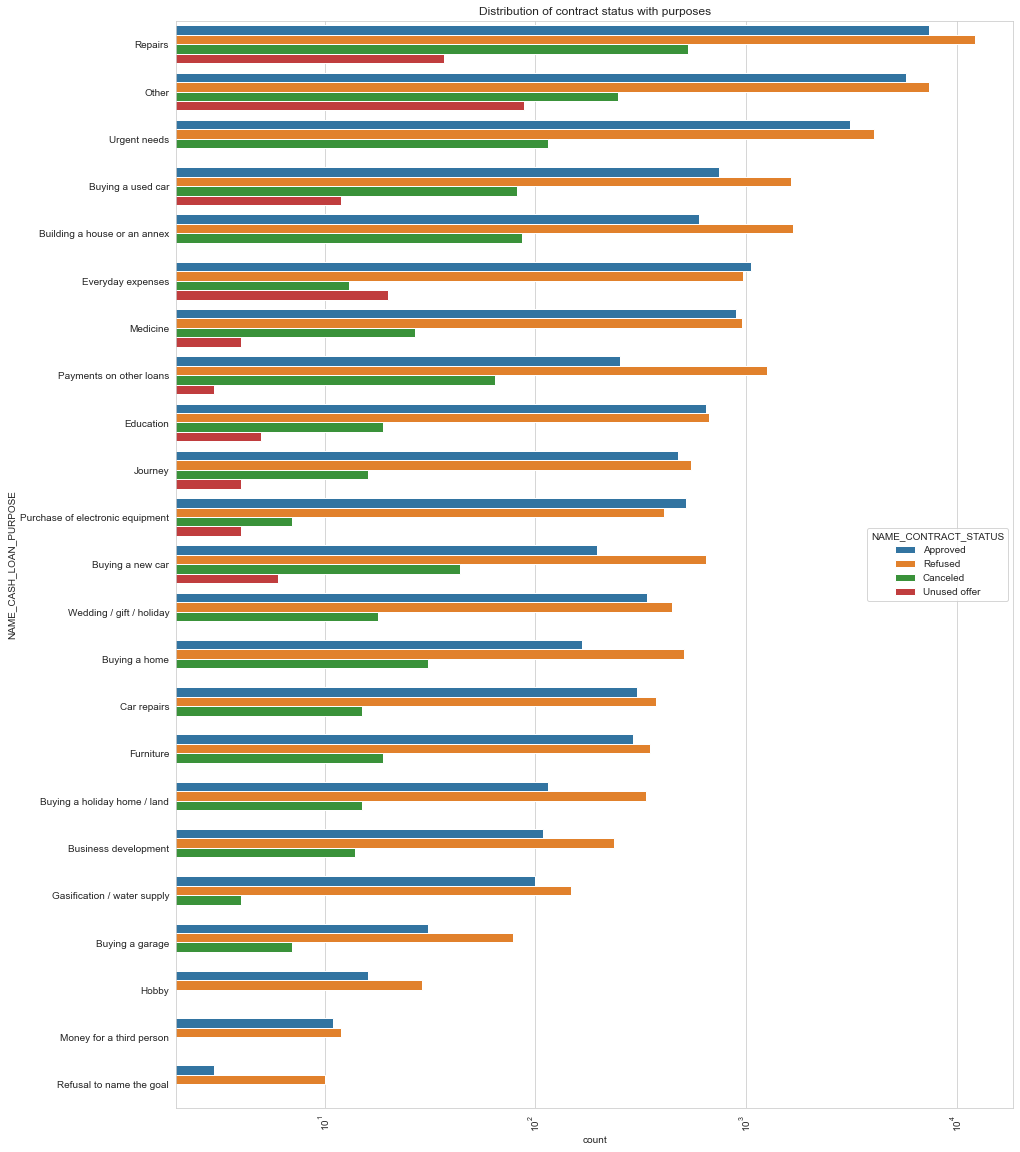

In [624]:
plt.figure(figsize=[15, 20])
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
sns.countplot(data = new_merge, y='NAME_CASH_LOAN_PURPOSE', order=new_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

Observation: <br>
1. There is significant rejection in loan of the people who have refused to name the goals 
2. People applying for loan for the repair purposes are facing highest rejection 
3. There are more approval than rejections on Everyday expenses and purchase of electronic equipments loan
4. Education and medicine purpose are having almost equal approvals and rejections 

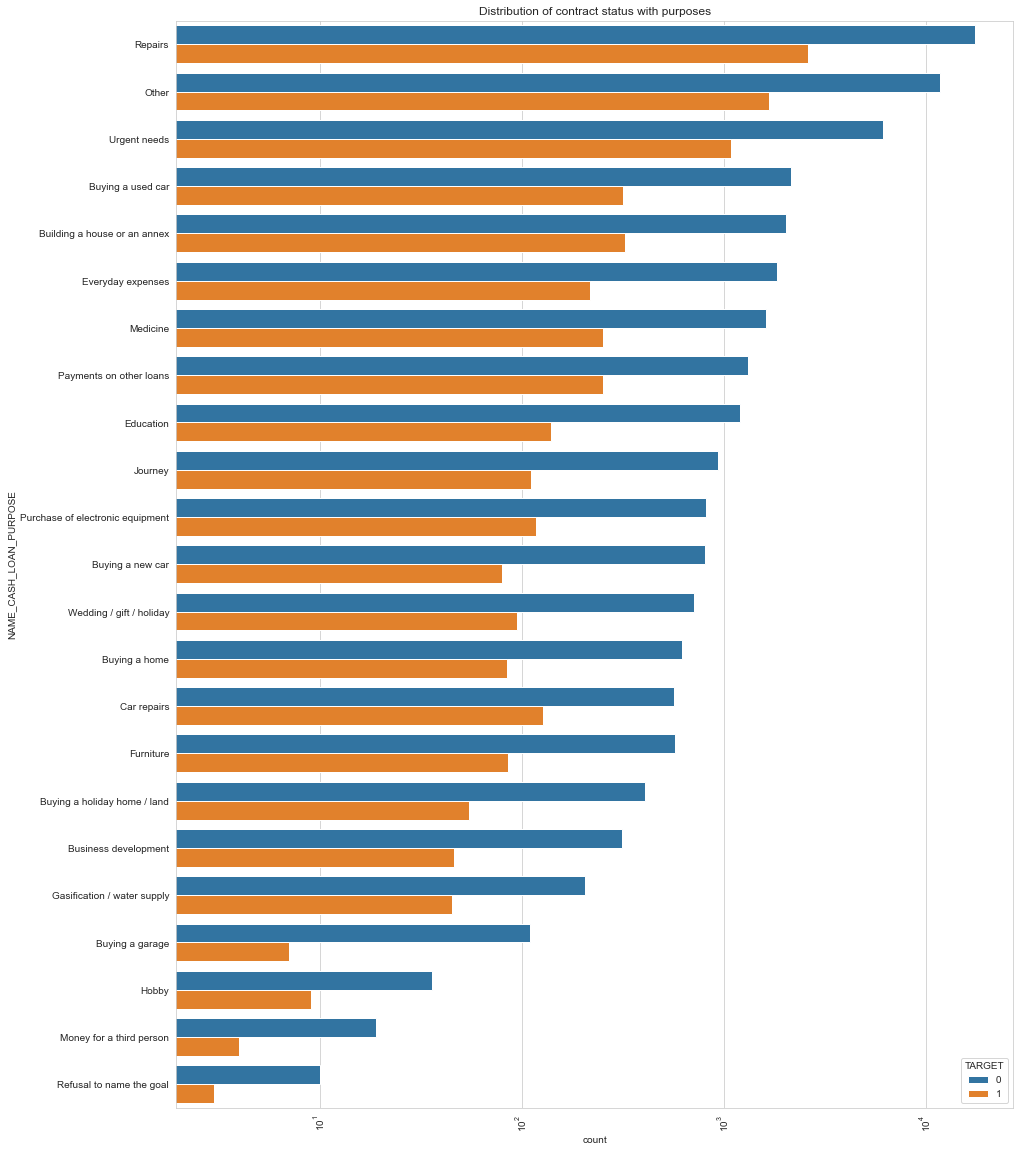

In [625]:
plt.figure(figsize=[15, 20])
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
sns.countplot(data = new_merge, y='NAME_CASH_LOAN_PURPOSE', order=new_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

Observation: <br>
1. People seeking loan for "buying a garage" has less likely to default. 
2. "Repairs" purposes are more likely to deafult and hence their loan rejection ratio was also higher 
3. Bank can focus on lending loans to people with "business development" "education" "buying a home/land" "buying a new car" as they are less likely to default

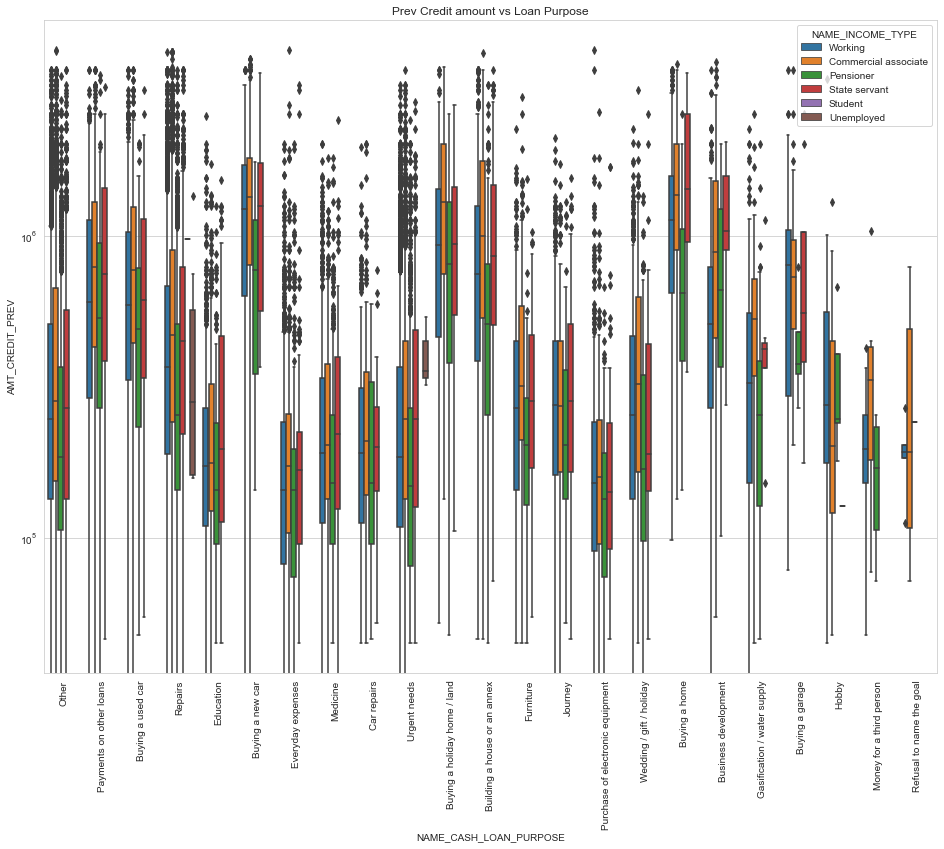

In [626]:
# Analysing loan purpose of previous loan amounts 
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_merge, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Observation: <br>
1. Credits are higher for people with "buying a new car" "buying a holiday home/land" "buying a home" "business development" purposes 
2. Students and Unemployed have overall low credit amounts as compared to other income type people 
3. State servants gets higher credits for education, journey and buying a home as compared to others 
4. Among Working class people, they have more credits for buying a new car 
5. Pensionars have more credits for buying a holiday home as compared to other purposes 

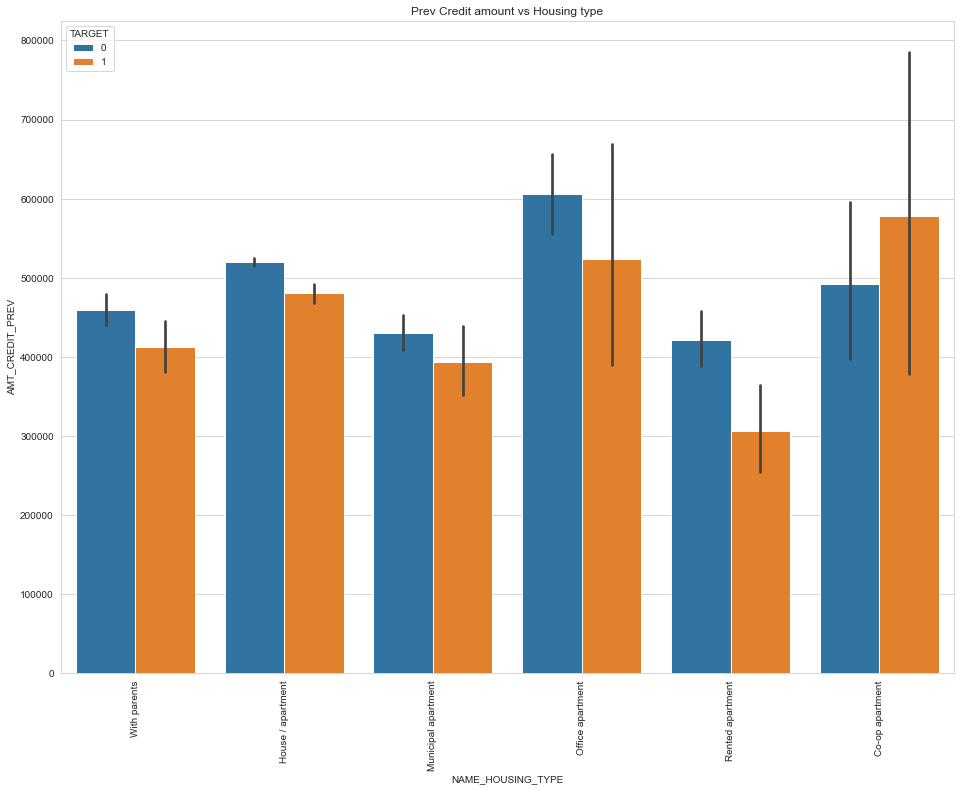

In [627]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_merge, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

Observation: <br>
1. Bank should focus on lending loans to people with housing type "office apartments"
2. Banks should analyse risk more closely before lending to people with housing type "Co-op apartment"